In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
df = pd.read_csv('anisotropy_k_neighbors.csv', index_col=0)
df.head()

,cloud,gf01_k_100,gf02_k_100,gf03_k_100,gf04_k_100,gf05_k_100,gf06_k_100,gf07_k_100,gf08_k_100,gf09_k_100,...,gf02_k_300,gf03_k_300,gf04_k_300,gf05_k_300,gf06_k_300,gf07_k_300,gf08_k_300,gf09_k_300,type,expression
0,bs000_CR_RD_0.pcd,15.757612,1.0,-29.797167,0.886765,0.543769,0.342996,0.063966,0.113235,0.363001,...,1.0,-135.127670,0.930348,0.296812,0.633535,0.048500,0.069652,0.224178,CR,RD
1,bs000_PR_SD_0.pcd,11.025925,1.0,-16.543877,0.855051,0.562840,0.292211,0.078235,0.144949,0.090016,...,1.0,-77.831032,0.897030,0.598803,0.298227,0.057055,0.102970,0.033172,PR,SD
2,bs000_LFAU_15_0.pcd,11.022415,1.0,-16.081404,0.803804,0.560791,0.243013,0.100449,0.196196,0.072107,...,1.0,-78.574463,0.893306,0.740965,0.152341,0.054593,0.106694,0.050208,LFAU,15
3,bs000_O_GLASSES_0.pcd,11.878249,1.0,-19.639990,0.929886,0.743944,0.185942,0.037212,0.070114,0.170811,...,1.0,-80.600998,0.893359,0.796068,0.097291,0.053072,0.106641,0.068491,O,GLASSES
4,bs000_UFAU_44_0.pcd,9.931419,1.0,-15.149104,0.964590,0.829940,0.134650,0.018630,0.035410,0.056714,...,1.0,-75.562958,0.945087,0.808929,0.136158,0.028619,0.054913,0.039941,UFAU,44


- gf01 Somatório: λ1 + λ2 + λ3
- gf02 Omnivariância: (λ1 * λ2 * λ3) ^ 1/3
- gf03 Autoentropia: Somatório i=1 λi * ln(λi)
- gf04 Anisotropia: (λ1 − λ3) / λ1
- gf05 Planaridade: (λ2 − λ3) / λ1
- gf06 Linearidade: (λ1 − λ2) / λ1
- gf07 Variação de superfı́cie: λ3 / (λ1 + λ2 + λ3)
- gf08 Esfericidade: λ3 / λ1
- gf09 Verticalidade: 1 − |<[0 0 1], e3>|

In [3]:
features = [
    'Somatório', 'Omnivariância', 'Autoentropia',
    'Anisotropia', 'Planaridade', 'Linearidade',
    'Variação de superfície', 'Esfericidade', 'Verticalidade'
]

In [4]:
columns = df.columns[1:-2]

In [5]:
def plot_histograms(df, k=100, expression=None):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    cols = [f'gf01_k_{k}', f'gf02_k_{k}', f'gf03_k_{k}',
            f'gf04_k_{k}', f'gf05_k_{k}', f'gf06_k_{k}',
            f'gf07_k_{k}', f'gf08_k_{k}', f'gf09_k_{k}']

    if expression is not None:
        df = df.loc[df['expression'] == expression]

    df = df[columns]

    i, j = 0, 0 # refactor
    for index, column in enumerate(cols):
        df.hist(ax=axes[i, j], column=[column], bins=10)
        axes[i, j].set_title(features[index])
        j += 1
        if j == 3:
            i += 1
            j = 0

    expression = '' if expression is None else f' - Expressão: {expression}'
    print(f'Histogramas - K vizinhos: {k} {expression}')
#     fig.suptitle(f'Histogramas - K vizinhos: {k} {expression}')
    plt.show()

Histogramas - K vizinhos: 100 


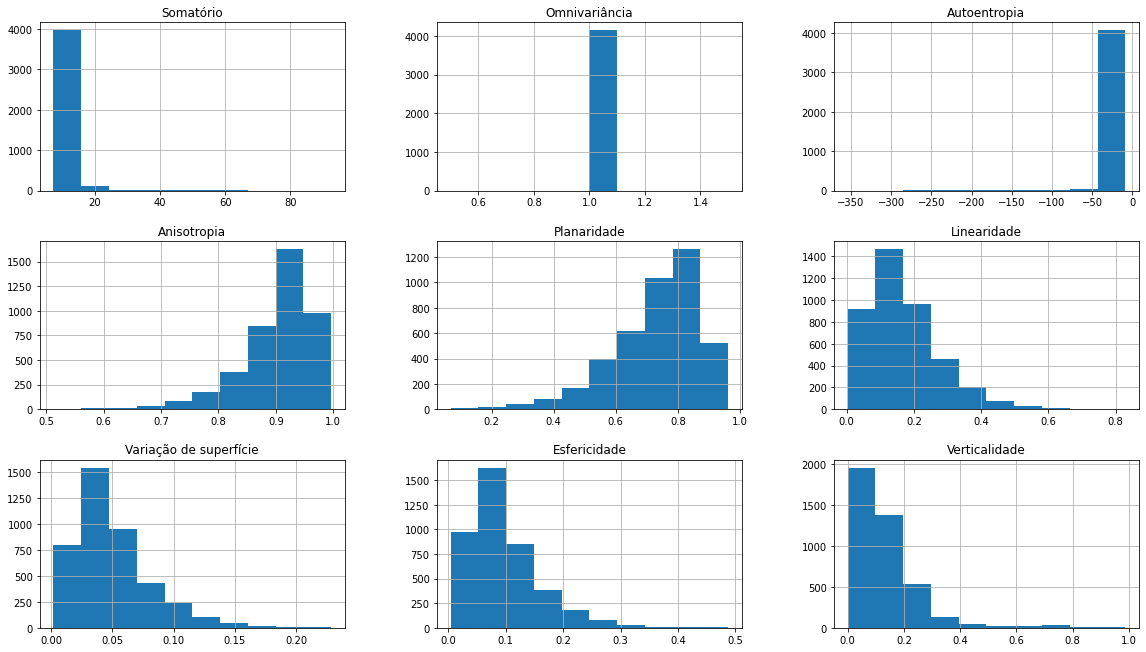

In [6]:
plot_histograms(df, k=100)

Histogramas - K vizinhos: 150 


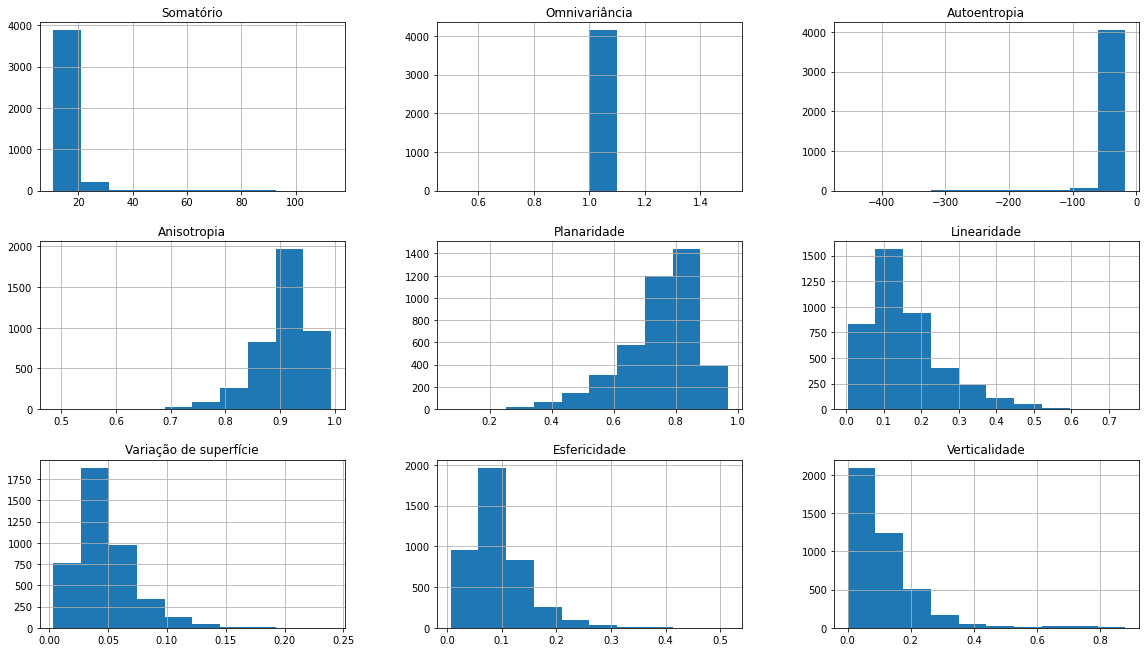

In [7]:
plot_histograms(df, k=150)

In [8]:
# gfIndex: valor entre 0-8
# 0 significa Somatório
# 8 significa Verticalidade
def plot_histogram_together(df, gfIndex=0):
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    labels = ['K 100', 'K 150', 'K 200', 'K 250', 'K 300']
    
    colsNames = []
    for i in range(9):
        aux = []
        for i in np.arange(i, 45, 9):
            aux.append(columns[i])
        colsNames.append(aux)        
    
    arr = []
    for col in colsNames[gfIndex]:
        arr.append(df[col])

    plt.hist(arr, bins=10, label=labels)
    plt.title(features[gfIndex])
    plt.legend(loc='upper right')

    plt.show()

In [9]:
def plot_histograms_together(df, gf=None):
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    labels = ['K 100', 'K 150', 'K 200', 'K 250', 'K 300']
    
    colsNames = []
    for i in range(9):
        aux = []
        for i in np.arange(i, 45, 9):
            aux.append(columns[i])
        colsNames.append(aux)        
    
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    i, j = 0, 0 # refactor
    for index, col in enumerate(colsNames):
        arr = []
        for c in col:
            arr.append(df[c])
        
        axes[i, j].hist(arr, bins=10, label=labels)
        axes[i, j].set_title(features[index])
        axes[i, j].legend(loc='upper right')
        j += 1
        if j == 3:
            i += 1
            j = 0

    plt.show()

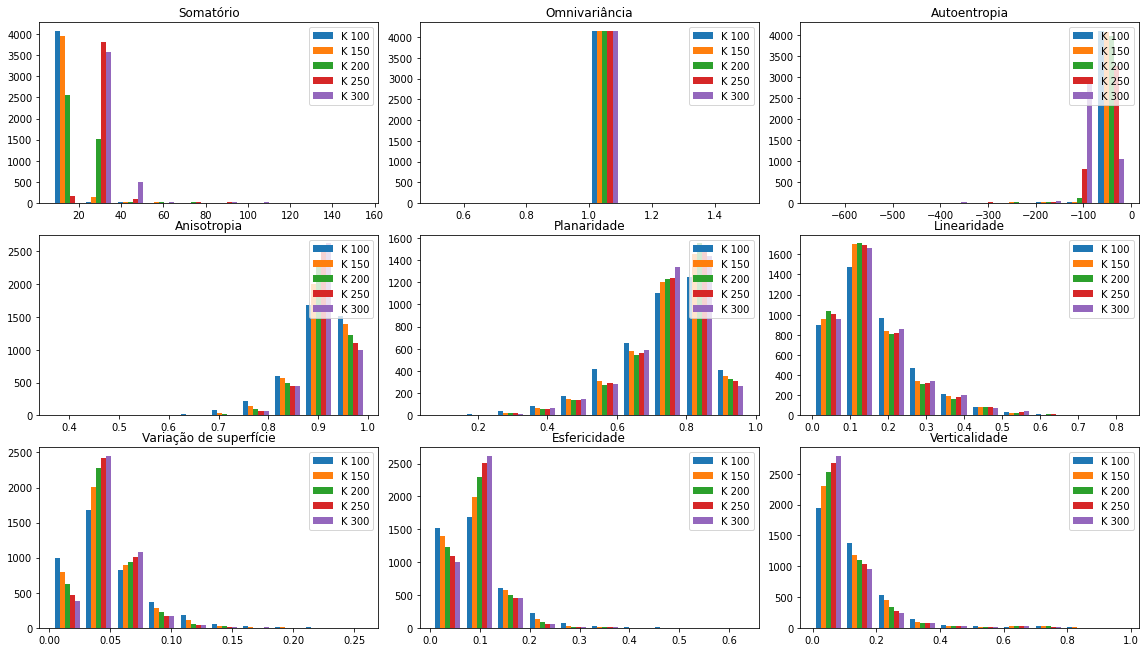

In [10]:
plot_histograms_together(df)

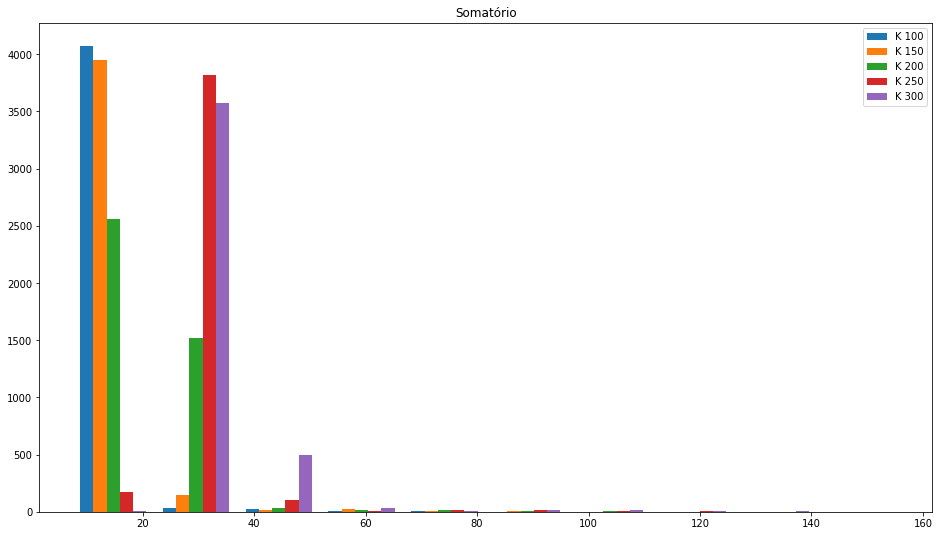

In [11]:
plot_histogram_together(df, gfIndex=0)

In [12]:
# helper datasets
dfr10 = df.iloc[:,1:10]
dfr10.columns = features
dfr11 = df.iloc[:,10:19]
dfr11.columns = features
dfr12 = df.iloc[:,19:28]
dfr12.columns = features
dfr13 = df.iloc[:,28:37]
dfr13.columns = features
dfr14 = df.iloc[:,37:46]
dfr14.columns = features

In [13]:
def plot_scatterplot(df, column, expression=None):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, col in enumerate(df.columns):
        df.plot.scatter(ax=axes[i, j], x=column, y=col)
        j += 1
        if j == 3:
            i += 1
            j = 0

    plt.show()

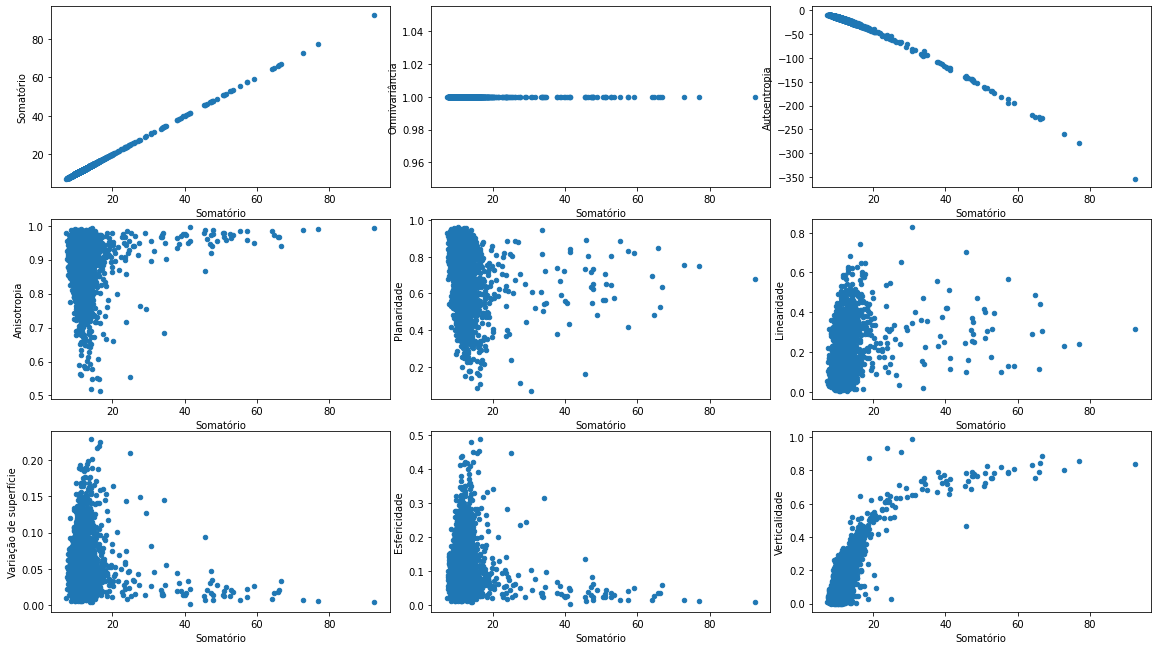

In [14]:
plot_scatterplot(dfr10, 'Somatório')

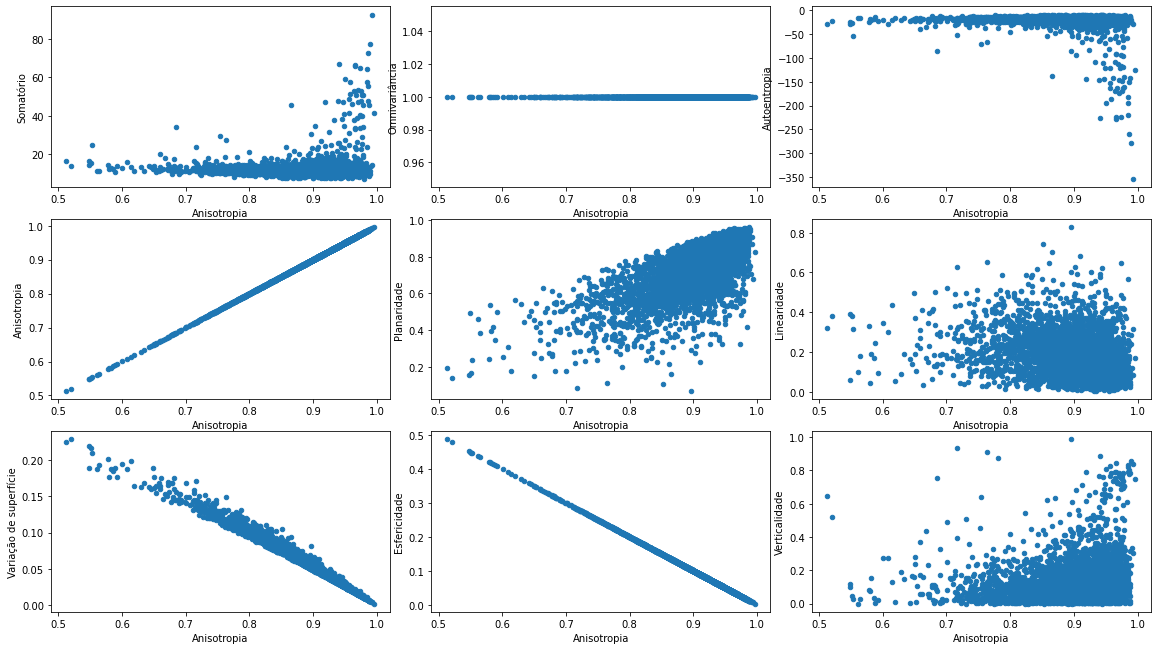

In [15]:
plot_scatterplot(dfr10, 'Anisotropia')